# Digital logistics service market size estimate for the next 5 years

## Uploading csv file

In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv('C:/Users/Leone/Desktop/File.csv', sep = ';', header = 0, names = ['Año','Participación del sector en millones de pesos'], decimal=",")

In [3]:
print (datos)

     Año  Participación del sector en millones de pesos
0   2004                                        6197.54
1   2005                                        6586.13
2   2006                                        6914.63
3   2007                                        7338.43
4   2008                                        7271.60
5   2009                                        6618.12
6   2010                                        7184.42
7   2011                                        7362.62
8   2012                                        7166.13
9   2013                                        7570.63
10  2014                                        7607.27
11  2015                                        7410.13
12  2016                                        7320.17
13  2017                                        7830.78
14  2018                                        8310.09
15  2019                                        8419.44


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Año                                            16 non-null     int64  
 1   Participación del sector en millones de pesos  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


## Plotting data


In [5]:
import matplotlib.pyplot as plt

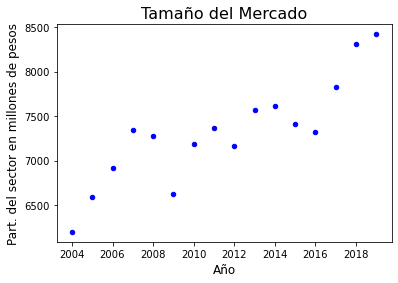

In [6]:
grafico = datos.sort_values('Participación del sector en millones de pesos', ascending = True)
grafico.plot(kind='scatter',x='Año',y='Participación del sector en millones de pesos', s=20, color='blue')
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Part. del sector en millones de pesos', fontsize = 12)
plt.title('Tamaño del Mercado', fontsize = 16)
plt.show()


## Machine learning: Simple Linear Regression


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
x = datos[['Año']]
y = datos['Participación del sector en millones de pesos']

In [9]:
X = np.array(x)   
print(X)

[[2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]


In [10]:
corr_test = pearsonr(datos['Año'],datos['Participación del sector en millones de pesos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8704400396638134
P-value:  1.1586673557050476e-05


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle = True)

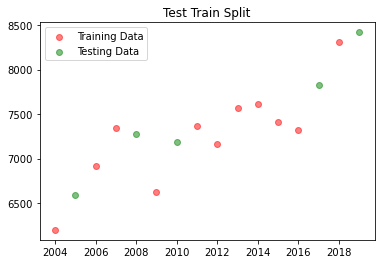

In [105]:
plt.scatter(X_train, y_train, label = 'Training Data', color = 'r', alpha = .5)
plt.scatter(X_test, y_test, label = 'Testing Data', color = 'g', alpha = .5)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [106]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

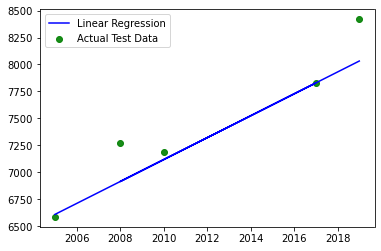

In [107]:
prediction = LR.predict(X_test)
plt.plot (X_test, prediction, label = 'Linear Regression', color ='b')
plt.scatter(X_test, y_test, label = 'Actual Test Data', color = 'g', alpha = .9)
plt.legend()
plt.show()

In [109]:
LR.score(X_test, y_test)

0.8536316991932025

In [111]:
import joblib 
joblib.dump(LR, 'modelo_entrenado.pkl') #Saving the model

['modelo_entrenado.pkl']

In [265]:
LR.predict (np.array ([[2013],[2014]]))[0]

7422.252534690109

## Machine Learning: Multiple Linear Regression

In [96]:
dataset = pd.read_csv('C:/Users/Leone/Desktop/File3.csv', sep = ';', header = 0, names = ['Año','Producción Agrícola Argentina en toneladas','Part. del sector en millones de pesos'], decimal=",", encoding='latin-1')

In [97]:
print (dataset)

     Año  Producción Agrícola Argentina en toneladas  \
0   2004                                   120160208   
1   2005                                   143293662   
2   2006                                   118789760   
3   2007                                   143004922   
4   2008                                   144323853   
5   2009                                    94221410   
6   2010                                   150024799   
7   2011                                   154553978   
8   2012                                   132875914   
9   2013                                   155339164   
10  2014                                   165570691   
11  2015                                   185897046   
12  2016                                   185962358   
13  2017                                   192867876   
14  2018                                   152010490   
15  2019                                   203385636   

    Part. del sector en millones de pesos  
0  

In [99]:
Año = dataset['Año'].values
Producción = dataset['Producción Agrícola Argentina en toneladas'].values
Participación = dataset['Part. del sector en millones de pesos'].values

In [100]:
import plotly.express as px

In [101]:
px.scatter_3d(dataset, x = 'Año', y = 'Part. del sector en millones de pesos', z = 'Producción Agrícola Argentina en toneladas', opacity = 0.5)

In [57]:
X2 = dataset.iloc[:,:2]
Y = dataset.iloc[:,2:]

In [88]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2,Y, train_size = 0.7, shuffle = True)

In [89]:
LR2 = LinearRegression()
LR2.fit(X_train1, y_train1)

LinearRegression()

In [90]:
LR2.score(X_test1, y_test1)

0.9111205446369091

In [91]:
#Adjusted R-squared = 1 - ((n-1)/(n-k-1))*(1-R^(2))
#Adjusted R-squared = 1-((16-1)/(16-2-1))*(1-(0.9111205446369091)^(2)) = 0.8040084387

### Predicted values

In [92]:
y_pred = np.squeeze(LR2.predict (X_test1))
y_test1 = np.squeeze(y_test1)

In [93]:
pred_y_df = pd.DataFrame({'Actual Value': y_test1, 'Predicted Value': y_pred, 'Difference': y_test1-y_pred})
pred_y_df[0:15]

,Actual Value,Predicted Value,Difference
2,6914.63,6716.533305,198.096695
10,7607.27,7536.348934,70.921066
15,8419.44,8067.938912,351.501088
1,6586.13,6682.019107,-95.889107
6,7184.42,7144.006595,40.413405


In [94]:
LR2.coef_ #Checking the coefficients (m1, m2)

array([[8.93830412e+01, 2.23918802e-06]])

In [95]:
LR2.intercept_ #Checking the intercept (b)

array([-172851.83993754])

#### Checking the Y with the equation: Y = m1X1 + m2X2 + b
#### Y = 8.93830412e+01*X1 + 2.23918802e-06*X2 -172851.83993754